In [1]:
import pandas as pd
from sberpm import DataHolder
from sberpm.metrics import TraceMetric, ActivityMetric
from sberpm.miners import SimpleMiner
from sberpm.miners import CausalMiner
from sberpm.miners import HeuMiner
from sberpm.miners import AlphaMiner
from sberpm.autoinsights import AutoInsights

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sberpm.visual import GraphvizPainter

In [2]:
data = pd.read_csv('../../data/4/merge_transactions.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22905 entries, 0 to 22904
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rpo_bar_code          22905 non-null  object 
 1   bar_code_type_l       22905 non-null  object 
 2   bar_code              22905 non-null  object 
 3   messageid             22905 non-null  object 
 4   oper_date_time        22905 non-null  object 
 5   oper_date_time_local  22905 non-null  object 
 6   oper_date_time_msk    22905 non-null  object 
 7   oper_type             22905 non-null  int64  
 8   oper_attr             21929 non-null  float64
 9   oper_type_local       22905 non-null  int64  
 10  oper_type_name_local  7661 non-null   object 
 11  index_oper            22713 non-null  object 
 12  country_oper          22905 non-null  int64  
 13  index_next            12051 non-null  float64
 14  sys_id_record         22905 non-null  object 
 15  type_of_operand1   

In [4]:
data[data.duplicated(keep=False)]

,rpo_bar_code,bar_code_type_l,bar_code,messageid,oper_date_time,oper_date_time_local,oper_date_time_msk,oper_type,oper_attr,oper_type_local,...,source_code,seal_num,entity_type,entity_type_loc_id,entity_type_loc_name,index_to,index_from,mass,document_form,date
14160,RL036786102RU,RM,RL036786102RU,ZTRACKINGRL036786102RU,2020-11-19 12:46:24,2020-11-19 15:46:24,2020-11-19 15:46:24,41,-1.0,41,...,POC,NaN,NaN,NaN,NaN,309640,500580,2065.0,NaN,2020-11-19
14164,RL036786102RU,RM,RL036786102RU,ZTRACKINGRL036786102RU,2020-11-19 12:46:24,2020-11-19 15:46:24,2020-11-19 15:46:24,41,-1.0,41,...,POC,NaN,NaN,NaN,NaN,309640,500580,2065.0,NaN,2020-11-19


In [5]:
data.head(1).T

,0
rpo_bar_code,LC111565332CN
bar_code_type_l,cPacket
bar_code,LC111565332CN
messageid,ZTRACKINGLC111565332CN
oper_date_time,2020-05-13 02:18:26
oper_date_time_local,2020-05-13 05:18:26
oper_date_time_msk,2020-05-13 05:18:26
oper_type,39
oper_attr,-1
oper_type_local,39


In [31]:
data.head(1).T.loc['sys_id_record'][0]

'[{"sysid_date_time":"2020-05-13 02:18:30","sysid_index":"104006","sysid_sourceid":"EAIS","sysid_po_version":"5.14.5"}]'

In [7]:
data['bar_code'].nunique()

200

In [8]:
data['bar_code_type_l'].unique()

array(['cPacket', 'RM', 'RDnR', 'EMS', 'Посылка'], dtype=object)

In [10]:
data['index_oper'].nunique() 

533

In [11]:
data['messageid'].nunique()

17518

In [7]:
data = data.drop_duplicates()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22904 entries, 0 to 22904
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rpo_bar_code          22904 non-null  object 
 1   bar_code_type_l       22904 non-null  object 
 2   bar_code              22904 non-null  object 
 3   messageid             22904 non-null  object 
 4   oper_date_time        22904 non-null  object 
 5   oper_date_time_local  22904 non-null  object 
 6   oper_date_time_msk    22904 non-null  object 
 7   oper_type             22904 non-null  int64  
 8   oper_attr             21928 non-null  float64
 9   oper_type_local       22904 non-null  int64  
 10  oper_type_name_local  7661 non-null   object 
 11  index_oper            22712 non-null  object 
 12  country_oper          22904 non-null  int64  
 13  index_next            12051 non-null  float64
 14  sys_id_record         22904 non-null  object 
 15  type_of_operand1   

In [6]:
trans_col = ['messageid',  'bar_code', 'bar_code_type_l', 
             'oper_date_time',  'oper_type', 'oper_attr', 'id_of_operand1', 'index_oper', 'country_oper',
             'source_code', 'software_version', 'document_form', 'date']
other_col = ['date_processed']

In [7]:
data['oper_date_time'] = pd.to_datetime(data['oper_date_time'])
data['date'] = pd.to_datetime(data['date'])
data = data[trans_col].sort_values(['bar_code', 'oper_date_time'])

In [8]:
data['id'] = np.arange(len(data))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22905 entries, 11580 to 852
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   messageid         22905 non-null  object        
 1   bar_code          22905 non-null  object        
 2   bar_code_type_l   22905 non-null  object        
 3   oper_date_time    22905 non-null  datetime64[ns]
 4   oper_type         22905 non-null  int64         
 5   oper_attr         21929 non-null  float64       
 6   id_of_operand1    22905 non-null  object        
 7   index_oper        22713 non-null  object        
 8   country_oper      22905 non-null  int64         
 9   source_code       22905 non-null  object        
 10  software_version  22905 non-null  object        
 11  document_form     8745 non-null   object        
 12  date              22905 non-null  datetime64[ns]
 13  id                22905 non-null  int64         
dtypes: datetime64[ns](2)

In [9]:
data[data['bar_code'] == 'LC157310400CN'].head(50)

,messageid,bar_code,bar_code_type_l,oper_date_time,oper_type,oper_attr,id_of_operand1,index_oper,country_oper,source_code,software_version,document_form,date,id
2017,ZTRACKINGLC157310400CN,LC157310400CN,cPacket,2020-06-26 09:00:18,39,-1.0,LC157310400CN,610500,156,RTM-,RTM-.RTM4601.03-18,NaN,2020-06-26,3493
2018,ZTRACKINGLC157310400CN,LC157310400CN,cPacket,2020-06-26 11:51:14,39,-1.0,LC157310400CN,104006,643,EAIS,EAIS.5.15.0,NaN,2020-06-26,3494
2019,ZTRACKINGLC157310400CN,LC157310400CN,cPacket,2020-06-26 11:51:22,39,-1.0,LC157310400CN,104006,643,EAIS,EAIS.5.15.0,NaN,2020-06-26,3495
2229,ZTRACKINGLC157310400CN,LC157310400CN,cPacket,2020-06-28 10:29:00,1,NaN,LC157310400CN,NaN,156,emsevt_v,emsevt_v.3,NaN,2020-06-28,3496
2091,ZTRACKINGLC157310400CN,LC157310400CN,cPacket,2020-06-28 21:00:00,33,-1.0,LC157310400CN,104002,156,I,I.3.1.15.27,NaN,2020-06-29,3497
2089,ZTRACKINGLC157310400CN,LC157310400CN,cPacket,2020-06-28 23:22:00,8,5.0,LC157310400CN,CNHGHA,156,emsevt_v,emsevt_v.3,NaN,2020-06-29,3498
2090,ZTRACKINGLC157310400CN,LC157310400CN,cPacket,2020-06-29 00:19:00,10,-1.0,LC157310400CN,CNHGHA,156,emsevt_v,emsevt_v.3,NaN,2020-06-29,3499
2522,A76B06DDEDFF1AAAE054D8D385F805AF,LC157310400CN,cPacket,2020-07-02 06:29:29,1004,-1.0,CNHGHARUMOWSAUU02265,102976,643,I,I.3.1.15.27,PREDES,2020-07-02,3500
2523,A76B06DDEDFE1AAAE054D8D385F805AF,LC157310400CN,cPacket,2020-07-02 06:29:29,1020,-1.0,CNHGHARUMOWSAUU02265,102976,643,I,I.3.1.15.27,PREDES,2020-07-02,3501
2525,A76B111FA4442616E054D8D385F805AF,LC157310400CN,cPacket,2020-07-02 06:44:58,1020,-1.0,CNHGHARUMOWSAUU02265011010214,102976,643,I,I.3.1.15.27,CN35,2020-07-02,3502


In [61]:
data[data['bar_code'] == 'LC157310400CN'].tail(50)

,messageid,bar_code,bar_code_type_l,oper_date_time,oper_type,oper_attr,id_of_operand1,index_oper,country_oper,source_code,software_version,document_form,date,id
2550,A76B060AFA78190EE054D8D385F805AF,LC157310400CN,cPacket,2020-07-03 13:17:42,1023,-1.0,1029764902686312,102976,643,I,I.3.1.15.27,NaN,2020-07-03,3530
2551,A76B05CBF1B3187BE054D8D385F805AF,LC157310400CN,cPacket,2020-07-03 13:17:42,8,6.0,LC157310400CN,102976,643,I,I.3.1.15.27,NaN,2020-07-03,3531
2535,A76B05C9C39318BAE054D8D385F805AF,LC157310400CN,cPacket,2020-07-03 13:17:43,1018,-1.0,1029764903212718,102976,643,I,I.3.1.15.27,F23A,2020-07-03,3532
2534,c6e09527-d850-4e52-8d0a-347e0436b4cb,LC157310400CN,cPacket,2020-07-03 17:43:47,1001,-1.0,1029764903212718,102152,643,SM,SM.01.17.067,F23A,2020-07-03,3533
2554,7659b278-9bcf-43a9-89c0-ed02d946c643,LC157310400CN,cPacket,2020-07-03 17:44:25,1001,-1.0,1029764903212589,102152,643,SM,SM.01.17.067,F23,2020-07-03,3534
2697,6c2576a6-2b28-41bc-971a-e1148af3b26e,LC157310400CN,cPacket,2020-07-03 18:06:25,1041,-1.0,1021524900053015,102152,643,SM,SM.01.17.067,F23A,2020-07-04,3535
2548,1e6a9f10-a2dc-4e5e-af9f-5f71d83e4089,LC157310400CN,cPacket,2020-07-03 18:08:49,1,NaN,1029764902686312,102152,643,SM,SM.01.17.067,NaN,2020-07-03,3536
2546,9c96f64e-689b-4843-b724-e55afeb20ff3,LC157310400CN,cPacket,2020-07-03 18:08:50,8,0.0,1029764902686312,102152,643,SM,SM.01.17.067,NaN,2020-07-03,3537
2549,3b04bbc9-9ef7-42ae-a077-4e935b56603b,LC157310400CN,cPacket,2020-07-03 19:11:27,8,0.0,1029764902686312,102152,643,SM,SM.01.17.067,NaN,2020-07-03,3538
2690,ebc2db05-9485-4806-a952-1102a425c005,LC157310400CN,cPacket,2020-07-03 21:14:14,1022,-1.0,1021524900055736,102152,643,SM,SM.01.17.067,F23,2020-07-04,3539


In [57]:
data.head(1).T

,11580
messageid,ZTRACKINGCJ103032005RU
bar_code,CJ103032005RU
bar_code_type_l,Посылка
oper_date_time,2020-10-22 11:48:00
oper_type,1
oper_attr,2
id_of_operand1,CJ103032005RU
index_oper,500983
country_oper,276
source_code,Cv


In [10]:
data_holder = DataHolder(data=data, 
                         id_column='bar_code', 
                         activity_column='index_oper', 
                         start_timestamp_column='oper_date_time', 
                         user_column='oper_type', 
                         time_format='%Y-%m-%d %H:%m:%s')

In [11]:
data['node'] = data['index_oper'].astype('str') + ' ' + data['oper_type'].astype('str') 
               #data['id_of_operand1'].astype('str') + ' ' + data['source_code'].astype('str')

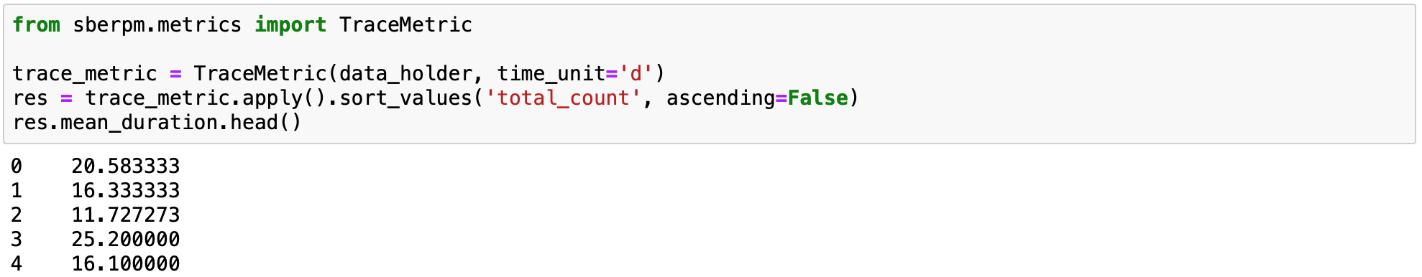

In [12]:
for bar_code in data[data['bar_code'].str.contains('LC')]['bar_code'].unique()[-10:]:
    
    data_holder = DataHolder(data=data[data['bar_code'] == bar_code], 
                         id_column='bar_code', 
                         activity_column='node', 
                         start_timestamp_column='oper_date_time', 
                         time_format='%Y-%m-%d %H:%m:%s')
    
    auto_i = AutoInsights(data_holder, time_unit='h')

    causal_miner = SimpleMiner(data_holder)
    auto_i.apply(miner=causal_miner, mode='overall', q_min=0.2, q_top=0.85)
    graph = auto_i.get_graph()

    painter = GraphvizPainter()
    painter.apply_insights(graph)
    painter.write_graph(f"../../data/4/insights_{bar_code}.png", format='png')
    break
    
    
#     simple_miner = SimpleMiner(data_holder)
#     # Calculation.
#     simple_miner.apply()
#     # Getting the result
#     graph = simple_miner.graph
#     painter = GraphvizPainter()
#     painter.apply(graph)
#     painter.write_graph(f"index_simple_miner{bar_code}.png", format='png')

In [25]:
trace_metric = TraceMetric(data_holder, time_unit='d')
tm_df = trace_metric.apply()

In [21]:
tm_df.head(1).T

,"(500983, 500983, 102902, 102902, 102902, 102902, 102902, 102902, 102902, 102902, 102902, 102902, 102902, 102902, 102902, 102902, 102902, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102901, 102002, 102002, 102002, 102002, 102002, 102002, 102002, 102002, 102152, 102152, 102152, 102152, 102152, 102152, 102152, 102152, 102152, 102152, 102152, 102152, 102152, 102152, 102152, 102152, 102152, 102152, 156961, 156961, 156961, 156961, 156961, 156961, 156961, 156961, 156961, 156961, 156961, 156961, 156961, 156961, 156961, 157229, 157229, 157229, 157229, 157229, 157229, 157229, 157229, 157229, 157229, 157229, 157229, ...)"
count,1
ids,{CJ103032005RU}
trace_length,108
unique_activities_num,8
loop_percent,92.5926
unique_users,"{1022, 1019, 14, 1026, 1044, 1014, 1042, 2, 10..."
unique_users_num,24
total_duration,382.118
mean_duration,382.118
median_duration,382.118


In [27]:
tm_df['total_duration'].values

array([ 15.9215625 , 152.54376157,  15.97583333,  46.75377315,
        39.68056713,  93.89736111,  16.01586806,  59.13232639,
        48.78478009,  19.40443287,  16.11314815,  41.04944444,
        25.61568287,   0.25418981,  18.30575231,  36.47765046,
        33.05766204,  30.96313657,  25.83976852, 106.57903935,
        17.65190972,  81.45267361,  20.10375   ,  34.24180556,
        39.84599537,  19.35164352,  41.91270833,  26.18315972,
        28.16032407,  35.45158565,  48.95685185,  23.04829861,
        20.60519676,  19.35068287,  18.04778935,  24.283125  ,
        69.09145833,  16.44200231,  78.85001157,  31.20472222,
        12.35755787,  23.07688657,  18.13311343,  22.04380787,
         6.0084375 ,  41.61471065,  12.76622685,  41.73728009,
        41.56024306,  32.59018519,  19.44563657,  30.49856481,
        35.97524306,  35.96975694,  26.83203704,  22.58988426,
        32.02861111,  26.92929398,  15.38045139,  28.77273148,
        20.84271991,  28.1383912 ,  20.84375   ,  42.79

In [49]:
tm_df['loop_percent'].values.mean()

89.46919561497667

In [42]:
# Creation of the miner object. It takes DataHolder and the parameters of the algorithm
# (this miner does not have any additional parameters).
simple_miner = SimpleMiner(data_holder)
# Calculation.
simple_miner.apply()
# Getting the result
graph = simple_miner.graph
painter = GraphvizPainter()
painter.apply(graph)
painter.write_graph("simple_miner.png", format='png')
painter.show()

In [76]:
# Miner
causal_miner = CausalMiner(data_holder)
causal_miner.apply()
graph = causal_miner.graph

# Visualization
painter = GraphvizPainter()
painter.apply(graph)
painter.write_graph("causal_miner.png", format='png')
painter.show()

In [79]:
# Miner
heu_miner = HeuMiner(data_holder, threshold=0.8)
heu_miner.apply()
graph = heu_miner.graph

# Visualization
painter = GraphvizPainter()
painter.apply(graph)
painter.write_graph("heu_miner.png", format='png')
painter.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.689962 to fit


In [81]:

# Miner
alpha_miner = AlphaMiner(data_holder)
alpha_miner.apply()
graph = alpha_miner.graph

# Visualization
painter = GraphvizPainter()
painter.apply(graph)
painter.write_graph("alpha_miner.png", format='png')
painter.show()

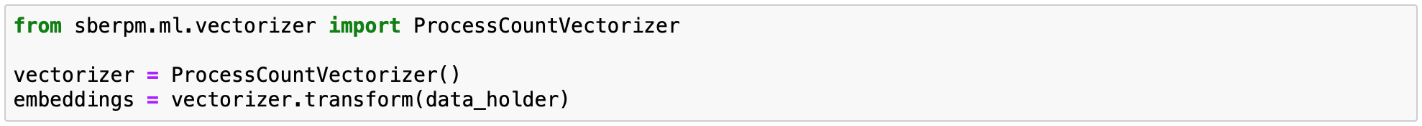

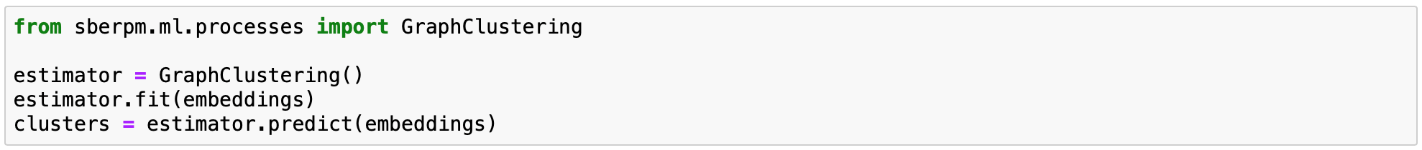

In [104]:
msk_barcodes = data[data['index_oper'] == '102976']['bar_code'].unique()
msk_data = data[data['bar_code'].isin(msk_barcodes)]
msk_data = msk_data[msk_data['index_oper'] == '102976']

In [105]:
data_holder = DataHolder(data=msk_data, 
                         id_column='bar_code', 
                         activity_column='node', 
                         start_timestamp_column='oper_date_time', 
                         user_column='oper_type', 
                         time_format='%Y-%m-%d %H:%m:%s')

In [113]:
msk_data[msk_data['bar_code'] == 'LC157310400CN']

,messageid,bar_code,bar_code_type_l,oper_date_time,oper_type,oper_attr,id_of_operand1,index_oper,country_oper,source_code,software_version,document_form,date,id,node
2522,A76B06DDEDFF1AAAE054D8D385F805AF,LC157310400CN,cPacket,2020-07-02 06:29:29,1004,-1.0,CNHGHARUMOWSAUU02265,102976,643,I,I.3.1.15.27,PREDES,2020-07-02,3500,102976 1004
2523,A76B06DDEDFE1AAAE054D8D385F805AF,LC157310400CN,cPacket,2020-07-02 06:29:29,1020,-1.0,CNHGHARUMOWSAUU02265,102976,643,I,I.3.1.15.27,PREDES,2020-07-02,3501,102976 1020
2525,A76B111FA4442616E054D8D385F805AF,LC157310400CN,cPacket,2020-07-02 06:44:58,1020,-1.0,CNHGHARUMOWSAUU02265011010214,102976,643,I,I.3.1.15.27,CN35,2020-07-02,3502,102976 1020
2524,A76B07A8E7C81894E054D8D385F805AF,LC157310400CN,cPacket,2020-07-02 06:44:59,1020,-1.0,CNHGHARUMOWSAUU02265011010214,102976,643,I,I.3.1.15.27,NaN,2020-07-02,3503,102976 1020
2527,A76B07A8E7F71894E054D8D385F805AF,LC157310400CN,cPacket,2020-07-02 06:45:07,1019,-1.0,CNHGHARUMOWSAUU02265011010214,102976,643,I,I.3.1.15.27,NaN,2020-07-02,3504,102976 1019
2512,A76B111FA4842616E054D8D385F805AF,LC157310400CN,cPacket,2020-07-02 06:45:11,1020,-1.0,GUID(2000000000000000000000001F8363D4),102976,643,I,I.3.1.15.27,NaN,2020-07-02,3505,102976 1020
2513,A76B07A8ACF41906E054D8D385F805AF,LC157310400CN,cPacket,2020-07-02 06:46:59,0,-1.0,LC157310400CN,102976,643,I,I.3.1.15.27,NaN,2020-07-02,3506,102976 0
2515,A76B07A8ACEF1906E054D8D385F805AF,LC157310400CN,cPacket,2020-07-02 06:46:59,9,-1.0,LC157310400CN,102976,643,I,I.3.1.15.27,NaN,2020-07-02,3507,102976 9
2519,A76B07A8ACF61906E054D8D385F805AF,LC157310400CN,cPacket,2020-07-02 06:46:59,1023,-1.0,LC157310400CN,102976,643,I,I.3.1.15.27,NaN,2020-07-02,3508,102976 1023
2517,A76B07A8AE161906E054D8D385F805AF,LC157310400CN,cPacket,2020-07-02 06:47:00,11,-1.0,LC157310400CN,102976,643,I,I.3.1.15.27,NaN,2020-07-02,3509,102976 11


In [121]:

auto_i = AutoInsights(data_holder, time_unit='h')

causal_miner = HeuMiner(data_holder)
auto_i.apply(miner=causal_miner, mode='overall')
graph = auto_i.get_graph()

painter = GraphvizPainter()
painter.apply_insights(graph)
painter.write_graph("insights_2.png", format='png')


heu_miner = SimpleMiner(data_holder)
heu_miner.apply()
graph = heu_miner.graph
nodes_count = ActivityMetric(data_holder, time_unit='h').count().to_dict()
dur = ActivityMetric(data_holder, time_unit='h').apply()['mean_duration'].to_dict()
graph.add_node_metric('count', nodes_count)
graph.add_node_metric('mean_duration', dur)
# Visualization
painter = GraphvizPainter()
painter.apply(graph)
painter.write_graph("simple_miner_2.png", format='png')
painter.show()